In [47]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://api.covidtracking.com/v1/states/daily.json"



In [48]:
# Realizar la solicitud (request) para obtener los datos JSON
response = requests.get(url)

# Verificar que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Cargar los datos JSON en un DataFrame de pandas utilizando json_normalize
    data = response.json()
    df = pd.json_normalize(data)
    
    display(df)
else:
    print("No se pudo obtener los datos JSON. Código de estado:", response.status_code)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,
20776,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,
20777,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,
20778,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,...,None,0,0,1881c8a2f0d337b22066b4f05df06eb2259e8d57,0,0,0,0,0,


In [50]:
df.isnull().sum(axis = 0)

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

In [51]:
# Удаление колонок, в которых все значения равны 0
df_filtered = df.loc[:, (df != 0).any(axis=0)]

# df_filtered теперь содержит только те колонки, в которых есть хотя бы одно ненулевое значение
df_filtered.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,...,0,0,56886,0,56886,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,...,408,2087,2431530,2347,2431530,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,...,165,3267,2805534,3380,2805534,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,0,0,2140,0,2140,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,...,1335,13678,3899464,45110,3899464,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,


In [53]:
df_filtered = df_filtered.drop(['checkTimeEt', 'dateChecked', 'dateModified', 'grade', 'negativeIncrease', 'pending', 'posNeg', 'total'], axis=1)
#Here are the columns with the "Deprecated" comment:
#checkTimeEt commercialScore dateChecked dateModified grade negativeIncrease negativeRegularScore negativeScore pending posNeg positiveScore score total

In [55]:
object_columns = df_filtered.select_dtypes(include='object')
object_columns.head()

,state,totalTestResultsSource,lastUpdateEt,fips,dataQualityGrade,hash
0,AK,totalTestsViral,3/5/2021 03:59,02,None,dc4bccd4bb885349d7e94d6fed058e285d4be164
1,AL,totalTestsPeopleViral,3/7/2021 11:00,01,None,997207b430824ea40b8eb8506c19a93e07bc972e
2,AR,totalTestsViral,3/7/2021 00:00,05,None,50921aeefba3e30d31623aa495b47fb2ecc72fae
3,AS,totalTestsViral,12/1/2020 00:00,60,None,f77912d0b80d579fbb6202fa1a90554fc4dc1443
4,AZ,totalTestsViral,3/7/2021 00:00,04,None,0437a7a96f4471666f775e63e86923eb5cbd8cdf


In [56]:
columns_to_exclude = ["totalTestResultsSource","lastUpdateEt", "fips", "dataQualityGrade", "hash"]
df_filtered = df_filtered.drop(columns=columns_to_exclude)

In [10]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   totalTestResults             20614 non-null  float64
 6   hospitalizedCurrently        17339 non-null  float64
 7   hospitalizedCumulative       12382 non-null  float64
 8   inIcuCurrently               11636 non-null  float64
 9   inIcuCumulative              3789 non-null   float64
 10  onVentilatorCurrently        9126 non-null   float64
 11  onVentilatorCumulative       1290 non-null   float64
 12  recovered                    12003 non-null  float64
 13  death           

In [59]:
df_filtered.head()

,date,state,positive,probableCases,negative,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
0,20210307,AK,56886.0,NaN,NaN,1731628.0,33.0,1293.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,20210307,AL,499819.0,107742.0,1931711.0,2323788.0,494.0,45976.0,NaN,2676.0,...,NaN,NaN,NaN,NaN,NaN,NaN,408,2347,-1,0
2,20210307,AR,324818.0,69092.0,2480716.0,2736442.0,335.0,14926.0,141.0,NaN,...,NaN,NaN,481311.0,81803.0,NaN,NaN,165,3380,22,11
3,20210307,AS,0.0,NaN,2140.0,2140.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,20210307,AZ,826454.0,56519.0,3073010.0,7908105.0,963.0,57907.0,273.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1335,45110,5,44


In [77]:
grouped = df_filtered.groupby("state").agg({"death": 'sum','deathIncrease':'sum'}).sort_values(by="death", ascending=False).head(30)
grouped

,death,deathIncrease
state,,
NY,8854467.0,39029
CA,5733089.0,54124
NJ,5352148.0,23574
TX,5256010.0,44451
FL,4471991.0,32266
IL,3601219.0,23014
PA,3384139.0,24349
MA,3195657.0,16417
MI,2892062.0,16658


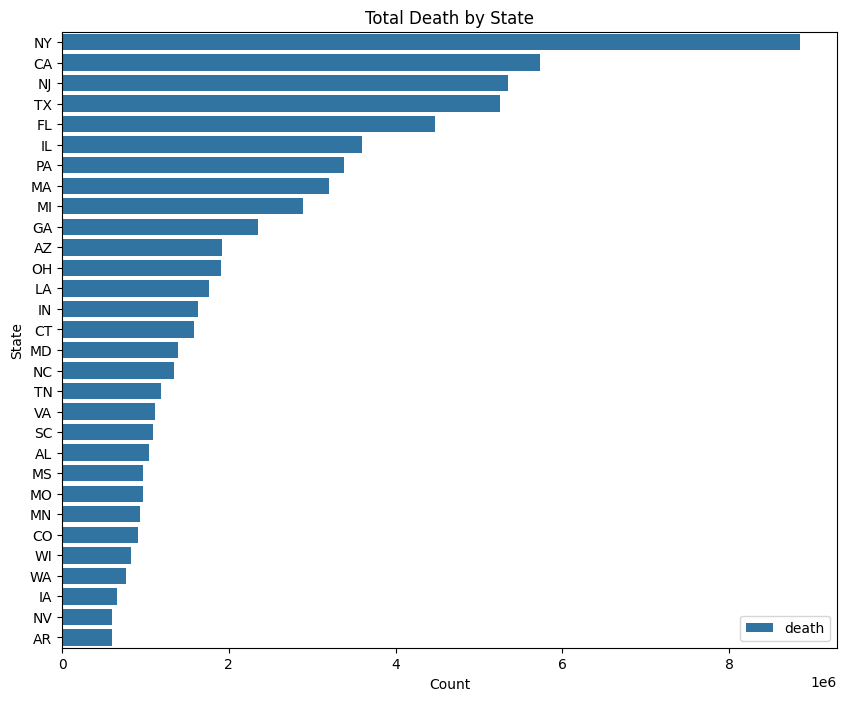

In [78]:
plt.figure(figsize=(10, 8))
grouped_reset = grouped.reset_index()  # Reset the index
grouped_melted = grouped_reset.melt(id_vars="state", value_vars=["death"], var_name="Count Type", value_name="Count")
sns.barplot(x="Count", y="state", hue="Count Type", data=grouped_melted)
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Total Death by State")
plt.legend()
plt.show()

### Population by state 10 top
- California: Approximately 39.5 million people
- Texas: Approximately 29.8 million people 
- Florida: Approximately 21.7 million people 
- New York: Approximately 20.2 million people 
- Pennsylvania: Approximately 13.1 million people
- Illinois: Approximately 12.7 million people 
- Ohio: Approximately 11.8 million people 
- Georgia: Approximately 10.8 million people 
- North Carolina: Approximately 10.7 million people 
- Michigan: Approximately 10.1 million people

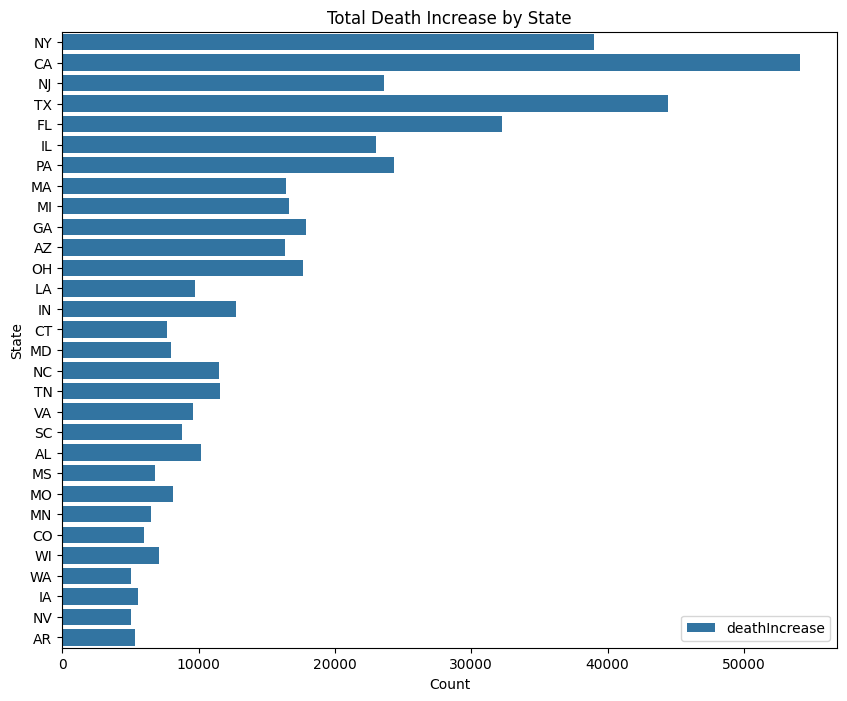

In [79]:
plt.figure(figsize=(10, 8))
grouped_reset = grouped.reset_index()  # Reset the index
grouped_melted = grouped_reset.melt(id_vars="state", value_vars=["deathIncrease"], var_name="Count Type", value_name="Count")
sns.barplot(x="Count", y="state", hue="Count Type", data=grouped_melted)
plt.xlabel("Count")
plt.ylabel("State")
plt.title("Total Death Increase by State")
plt.legend()
plt.show()

In [58]:
# Filter the rows where the "state" column is 'CA'
ca_data = df_filtered[df_filtered["state"] == 'CA']

# Group the filtered data by the "state" column
grouped = ca_data.groupby("state").agg({
    "deathConfirmed": 'mean',
    "death": 'mean',
    'deathIncrease': 'mean',
    'deathProbable': 'mean'
}).sort_values(by="death", ascending=False)

print(grouped)

       deathConfirmed         death  deathIncrease  deathProbable
state                                                            
CA                NaN  15881.132964     146.677507            NaN


In [80]:
grouped = df_filtered.groupby("state").agg({"positive": 'sum', "positiveIncrease": 'sum',"totalTestResults": 'sum',"totalTestResultsIncrease": 'sum',"death": 'sum','deathIncrease':'sum', 'hospitalizedCurrently': 'sum'}).sort_values(by="positive", ascending=False).head(10)
grouped

,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,death,deathIncrease,hospitalizedCurrently
state,,,,,,,
CA,379100459.0,3501341,5.833385e+09,49645499,5733089.0,54124,2653612.0
TX,311242452.0,2686818,2.578428e+09,19907378,5256010.0,44451,2130880.0
FL,246537443.0,1909209,2.886547e+09,22339181,4471991.0,32266,1149908.0
NY,216883639.0,1681169,4.549993e+09,39695100,8854467.0,39029,1614237.0
IL,155523687.0,1198331,2.292160e+09,18640190,3601219.0,23014,973480.0
GA,123499113.0,1023485,1.004321e+09,7359069,2349202.0,17906,797424.0
NJ,105084623.0,812609,1.411225e+09,10999550,5352148.0,23574,811696.0
OH,103133347.0,978471,1.300801e+09,10257157,1909606.0,17656,577287.0
PA,101072365.0,948643,1.291584e+09,10681716,3384139.0,24349,714330.0


In [30]:
grouped.corr()

,positive,positiveIncrease,totalTestResults,totalTestResultsIncrease,death,deathIncrease,hospitalizedCurrently,hospitalizedIncrease
positive,1.000000,0.995430,0.929535,0.909802,0.857181,0.974164,0.981362,0.276263
positiveIncrease,0.995430,1.000000,0.922866,0.904963,0.827902,0.967303,0.982161,0.251227
totalTestResults,0.929535,0.922866,1.000000,0.997759,0.902474,0.938398,0.931356,0.168011
totalTestResultsIncrease,0.909802,0.904963,0.997759,1.000000,0.895776,0.923734,0.917008,0.146791
death,0.857181,0.827902,0.902474,0.895776,1.000000,0.930848,0.878225,0.258071
deathIncrease,0.974164,0.967303,0.938398,0.923734,0.930848,1.000000,0.980022,0.270494
hospitalizedCurrently,0.981362,0.982161,0.931356,0.917008,0.878225,0.980022,1.000000,0.193764
hospitalizedIncrease,0.276263,0.251227,0.168011,0.146791,0.258071,0.270494,0.193764,1.000000


<Axes: >

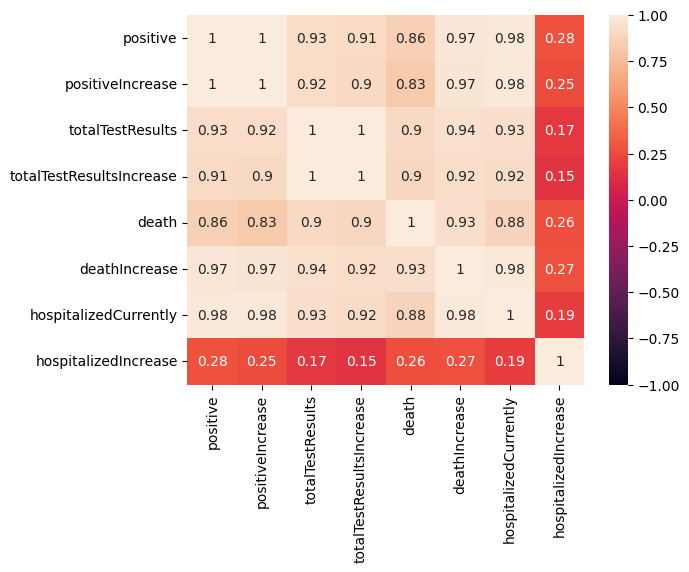

In [31]:
sns.heatmap(grouped.corr(), vmin=-1., vmax=1., annot=True)
# A partir de la tabla de correlación, obtenemos el mapa de calor 

<Axes: >

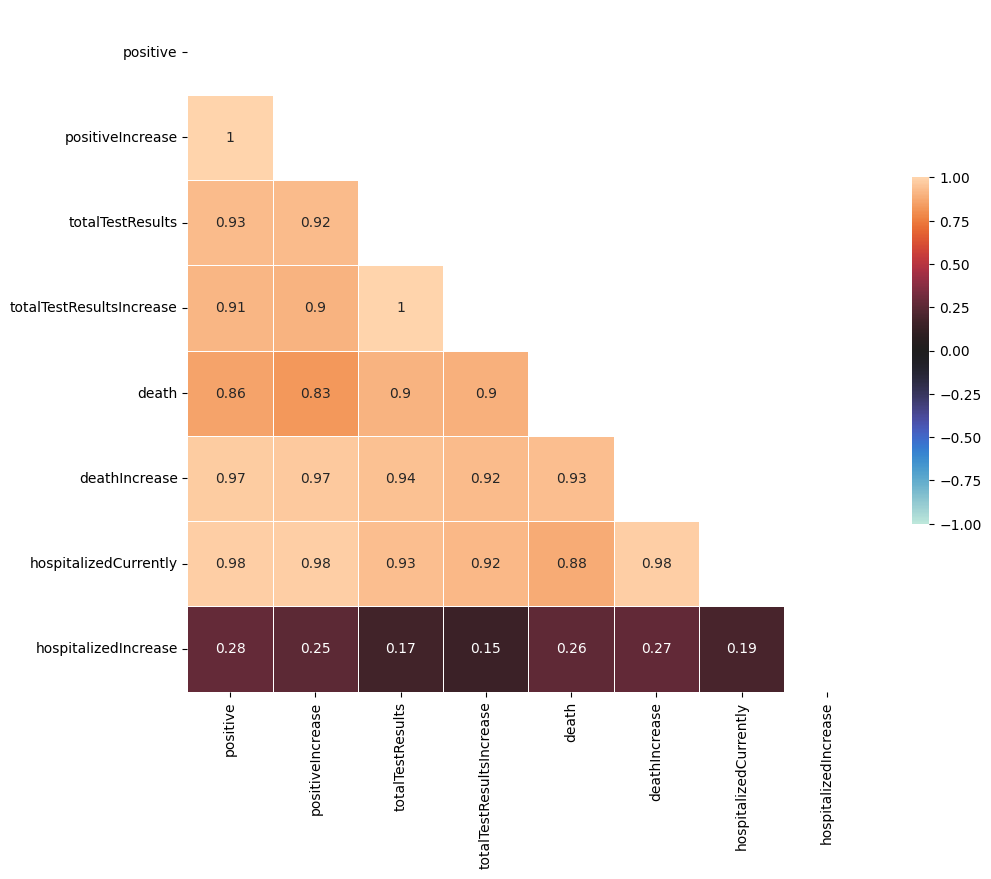

In [32]:
# Ahora igual pero más bonito

# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(grouped.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
sns.heatmap(grouped.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

<Axes: >

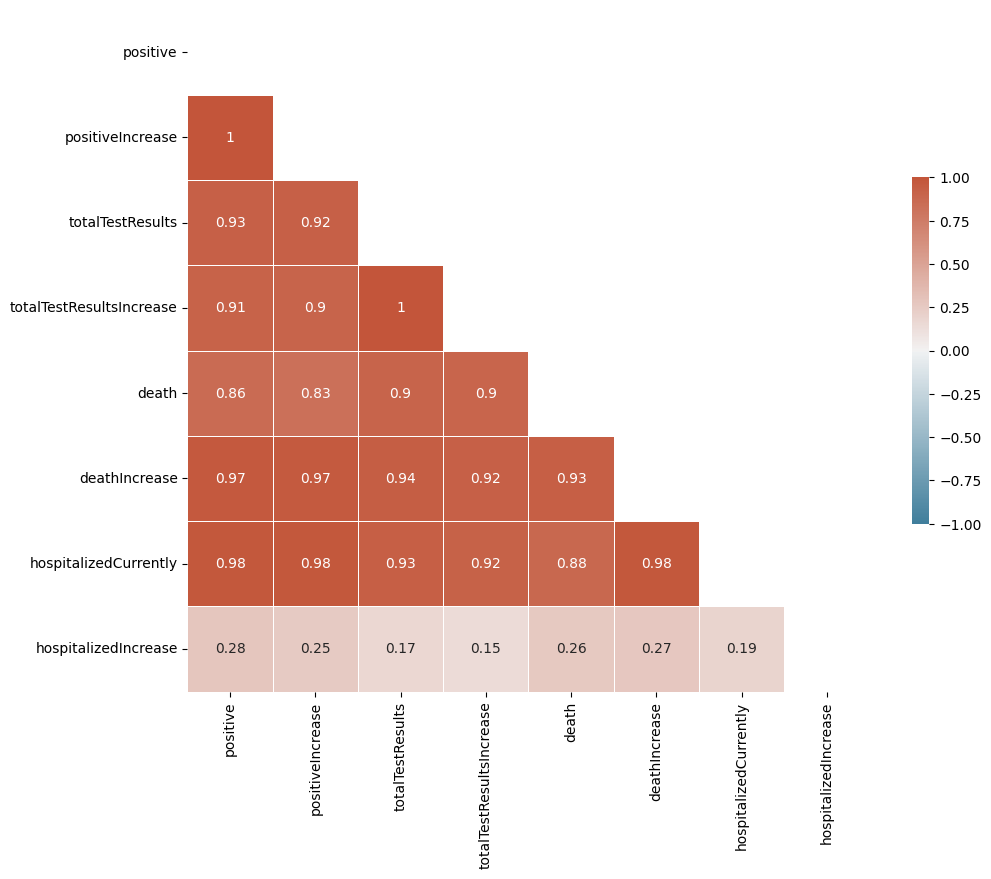

In [33]:
# Ahora igual pero otros colores
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(grouped.corr(), mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)